# **POSTTEST 7**
# NAMA : WINA AULIA NUGRASARI
# NIM : 2109106118

LINK DATASET : https://www.kaggle.com/datasets/ihelon/lego-minifigures-classification

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ihelon/lego-minifigures-classification

 38% 11.0M/28.8M [00:00<00:00, 106MB/s]
100% 28.8M/28.8M [00:00<00:00, 180MB/s]


In [3]:
!unzip lego-minifigures-classification.zip -d dataset_directory

Archive:  lego-minifigures-classification.zip
  inflating: dataset_directory/LICENSE  
  inflating: dataset_directory/harry-potter/0001/001.jpg  
  inflating: dataset_directory/harry-potter/0001/002.jpg  
  inflating: dataset_directory/harry-potter/0001/003.jpg  
  inflating: dataset_directory/harry-potter/0001/004.jpg  
  inflating: dataset_directory/harry-potter/0001/005.jpg  
  inflating: dataset_directory/harry-potter/0001/006.jpg  
  inflating: dataset_directory/harry-potter/0001/007.jpg  
  inflating: dataset_directory/harry-potter/0001/008.jpg  
  inflating: dataset_directory/harry-potter/0001/009.jpg  
  inflating: dataset_directory/harry-potter/0001/010.jpg  
  inflating: dataset_directory/harry-potter/0001/011.jpg  
  inflating: dataset_directory/harry-potter/0001/012.jpg  
  inflating: dataset_directory/harry-potter/0001/013.jpg  
  inflating: dataset_directory/harry-potter/0002/001.jpg  
  inflating: dataset_directory/harry-potter/0002/002.jpg  
  inflating: dataset_directo

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [5]:
path = '/content/dataset_directory'

In [6]:
import os

In [7]:
data = os.listdir(path)
data

['harry-potter',
 'metadata.csv',
 'jurassic-world',
 'marvel',
 'test.csv',
 'star-wars',
 'test',
 'index.csv',
 'LICENSE']

## **Mengatur path dataset menjadi 3 train, val, test**

In [8]:
train_dir = '/content/dataset_directory'
validation_dir = '/content/dataset_directory'
test_dir = '/content/dataset_directory'

## **Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data**

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## **Split dataset menjadi train, val, dan test**

DATA TRAIN

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 494 images belonging to 5 classes.


DATA VAL

In [12]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 494 images belonging to 5 classes.


DATA TEST

In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 494 images belonging to 5 classes.


## **Membuat model sequential**

In [14]:
model = Sequential()

## **Menggunakan pre-trained model VGG16**

In [15]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


## **Menggunakan optimizer, loss, dan metrics**

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## **Callbacks**

In [17]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

## **Latih Model**

In [18]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
16/16 [==============================] - 18s 385ms/step - loss: -159.0702 - accuracy: 0.0587 - val_loss: -378.1455 - val_accuracy: 0.0567 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - 6s 395ms/step - loss: -590.1049 - accuracy: 0.0567 - val_loss: -928.4173 - val_accuracy: 0.0567 - lr: 0.0010
Epoch 3/10
16/16 [==============================] - 5s 327ms/step - loss: -1207.7806 - accuracy: 0.0567 - val_loss: -1711.7781 - val_accuracy: 0.0567 - lr: 0.0010
Epoch 4/10
16/16 [==============================] - 6s 393ms/step - loss: -2050.9614 - accuracy: 0.0567 - val_loss: -2767.8860 - val_accuracy: 0.0567 - lr: 0.0010
Epoch 5/10
16/16 [==============================] - 5s 333ms/step - loss: -3186.7637 - accuracy: 0.0567 - val_loss: -4126.1362 - val_accuracy: 0.0567 - lr: 0.0010
Epoch 6/10
16/16 [==============================] - 6s 386ms/step - loss: -4629.1152 - accuracy: 0.0567 - val_loss: -5843.1792 - val_accuracy: 0.0567 - lr: 0.0010
Epoch 7/10
16/16 [=======

### **Evaluasi model**

In [19]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

16/16 [==============================] - 2s 91ms/step - loss: -16176.0098 - accuracy: 0.0567
Akurasi pada data test: 0.06


## **Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation**

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

## **Grafik Accuracy**

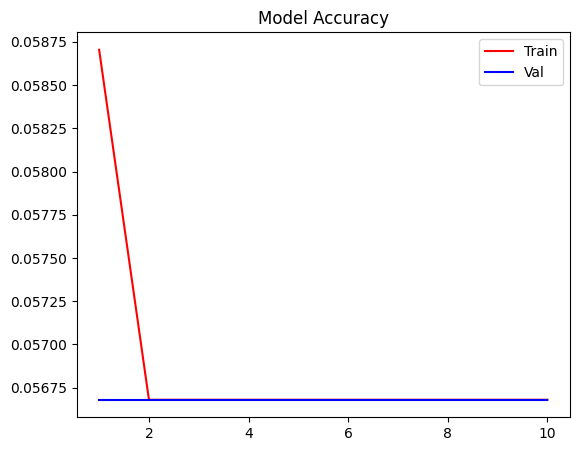

In [21]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

## **Grafik Loss**

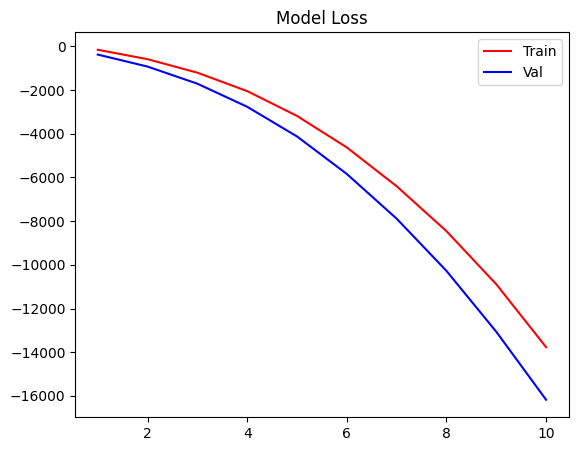

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

## **IMPORT GAMBAR**

In [23]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [28]:
path_gambar = '/content/dataset_directory/marvel/0001/002.jpg'

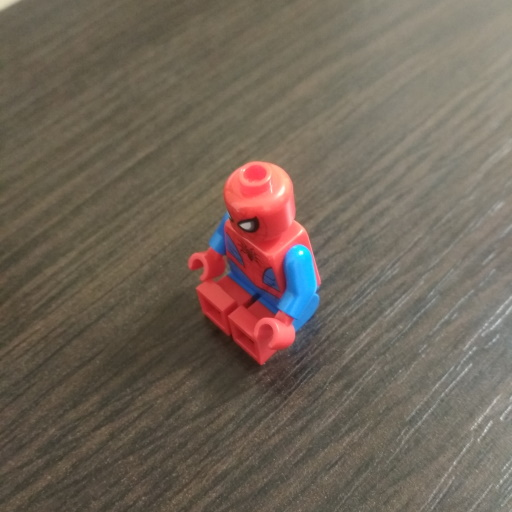

In [30]:
gambar = load_img('/content/dataset_directory/marvel/0001/002.jpg')
gambar

In [32]:
brigth = random_brightness(gambar, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum argumentasi')

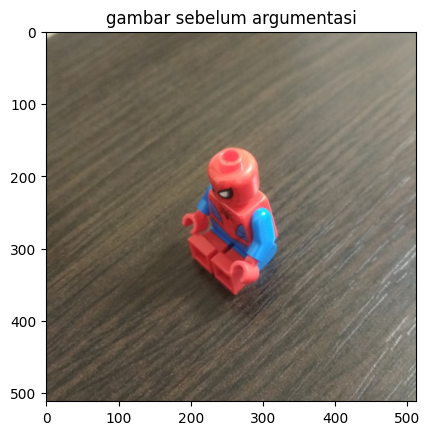

In [33]:
plt.imshow(gambar)
plt.title('gambar sebelum argumentasi')